## How have the main sources of Energy Generation in the State of Colorado been changing over the last several years? 
This analysis will dive into the changes in both Renewable Energy and Non-Renewable energy generation, as well as have a prediction of what the energy generation of these resources will look like in the following years. 


In [1]:
#template for data analysis using the CSV files we created

In [2]:
#import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
#Read in total energy csv file and create data frame
total_energy_df = pd.DataFrame(pd.read_csv('CSV/total_renewable_energy.csv'))
#Read in price and create data frame
price_df = pd.DataFrame(pd.read_csv('CSV/energyprices.csv'))

#Read in coal generated csv file and create data frame
coal_gen = pd.DataFrame(pd.read_csv('CSV/Coal_Generated.csv'))

#Read in coal generated csv file and create data frame
nat_gas_gen = pd.DataFrame(pd.read_csv('CSV/Nat_Gas_Generated.csv'))

In [4]:
total_energy_df.head()

,Period,Energy Type,Value,Unit
0,2016,Total Renewable Energy Consumption in Trillion...,10408.662,Trillion Btu
1,2016,Total Renewable Energy Consumed by the Commerc...,242.294,Trillion Btu
2,2016,Total Renewable Energy Consumed by the Electri...,5529.156,Trillion Btu
3,2016,Total Renewable Energy Consumed by the Industr...,2522.887,Trillion Btu
4,2016,Total Renewable Energy Production in Trillion Btu,10477.366,Trillion Btu


r-value = 0.940015062885721


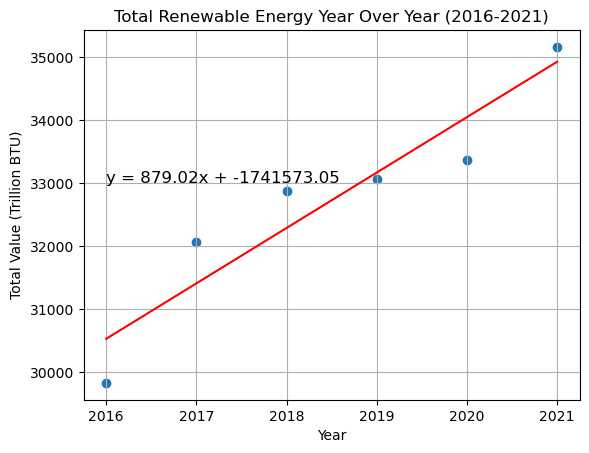

In [5]:
#Create scatter plot with regression line 
units_df = total_energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

# Filter the DataFrame to only include Trillion Btu units and group by period
btu_df = units_df[units_df['Unit'] == 'Trillion Btu'].groupby('Period')['Value'].sum().reset_index()

# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Value', data=btu_df)

plt.xlabel('Year')
plt.ylabel('Total Value (Trillion BTU)')
plt.title('Total Renewable Energy Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(btu_df['Period'], btu_df['Value'])
plt.plot(btu_df['Period'], m*btu_df['Period'] + b, color='red')
plt.text(2016, 33000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()


In [6]:
hydro_df = pd.DataFrame(pd.read_csv('CSV/Hydro.csv'))
hydro_df

,Period,Energy Type,Use,Unit
0,2016,conventional hydroelectric,1902.571,thousand megawatthours
1,2017,conventional hydroelectric,1897.228,thousand megawatthours
2,2018,conventional hydroelectric,1825.385,thousand megawatthours
3,2019,conventional hydroelectric,1811.001,thousand megawatthours
4,2020,conventional hydroelectric,1668.561,thousand megawatthours
5,2021,conventional hydroelectric,1598.310,thousand megawatthours


r-value = -0.9561538390465163


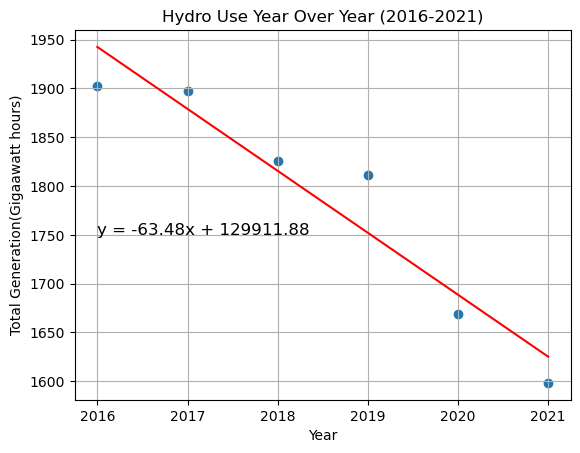

In [7]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=hydro_df)

plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Hydro Use Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(hydro_df['Period'], hydro_df['Use'])
plt.plot(hydro_df['Period'], m*hydro_df['Period'] + b, color='red')
plt.text(2016, 1750, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

### Hydroelectic use in Colorado has declined steadily on average over the last 6 years. It has the smallest percentage of use of the three larger renewable energy sources in Colorado.



In [8]:
solar_df = pd.DataFrame(pd.read_csv('CSV/Solar.csv'))
solar_df

,Period,Energy Type,Use,Unit
0,2016,estimated total solar,999.12099,thousand megawatthours
1,2017,estimated total solar,1485.13282,thousand megawatthours
2,2018,estimated total solar,1652.53998,thousand megawatthours
3,2019,estimated total solar,1851.65606,thousand megawatthours
4,2020,estimated total solar,2204.37961,thousand megawatthours
5,2021,estimated total solar,2786.11122,thousand megawatthours


r-value = 0.9802691785794908


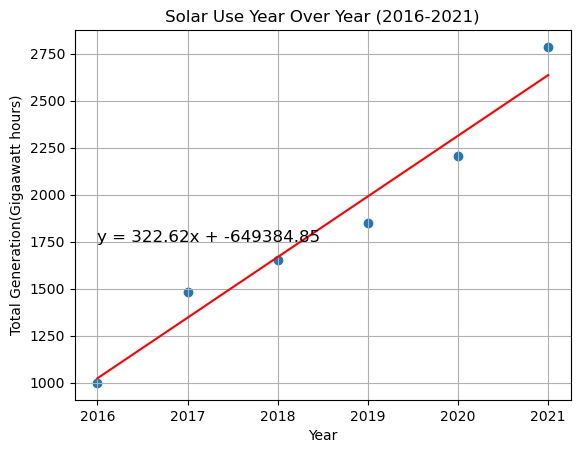

In [9]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=solar_df)

plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Solar Use Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(solar_df['Period'], solar_df['Use'])
plt.plot(solar_df['Period'], m*solar_df['Period'] + b, color='red')
plt.text(2016, 1750, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

### Solar power has shown a steady increase over the last 6 years in Colorado. There was a large increase between 2020 and 2021 possibly indicating that this energy source will continue to grow as a viable source for years to come.



In [10]:
wind_df = pd.DataFrame(pd.read_csv('CSV/Wind.csv'))
wind_df

,Period,Energy Type,Use,Unit
0,2016,wind,9421.20400,thousand megawatthours
1,2017,wind,9314.66295,thousand megawatthours
2,2018,wind,9745.15000,thousand megawatthours
3,2019,wind,10852.37576,thousand megawatthours
4,2020,wind,13386.22800,thousand megawatthours
5,2021,wind,15125.69700,thousand megawatthours


r-value = 0.9274936502735128


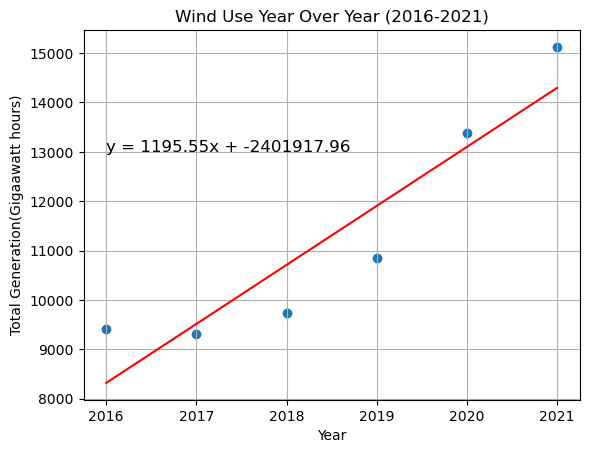

In [11]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Use', data=wind_df)

plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Wind Use Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(wind_df['Period'], wind_df['Use'])
plt.plot(wind_df['Period'], m*wind_df['Period'] + b, color='red')
plt.text(2016, 13000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

### Wind power is the largest renewable energy source in Colorado. Its use continues to grow year over year with no indication of waning. 



In [12]:
# read in hydro energy, This hydro is briken down by month. 
hydro_energy_df = pd.DataFrame(pd.read_csv('CSV/Hydro_energy_generation.csv'))
hydro_energy_df['Period'] = pd.to_datetime(hydro_energy_df['Period'])
hydro_energy_df.sort_values(by='Period', inplace = True)
mask = (hydro_energy_df['Period'] > '2016-01-01') & (hydro_energy_df['Period'] <= '2021-12-01')
correct_hydro_range=hydro_energy_df.loc[mask]
correct_hydro_range.head()

,Fuel Type,Energy Generation,Energy Units,Location,Period
83,conventional hydroelectric,210.96322,thousand megawatthours,CO,2016-02-01
82,conventional hydroelectric,221.82985,thousand megawatthours,CO,2016-03-01
81,conventional hydroelectric,114.86442,thousand megawatthours,CO,2016-04-01
80,conventional hydroelectric,147.51731,thousand megawatthours,CO,2016-05-01
79,conventional hydroelectric,220.57748,thousand megawatthours,CO,2016-06-01


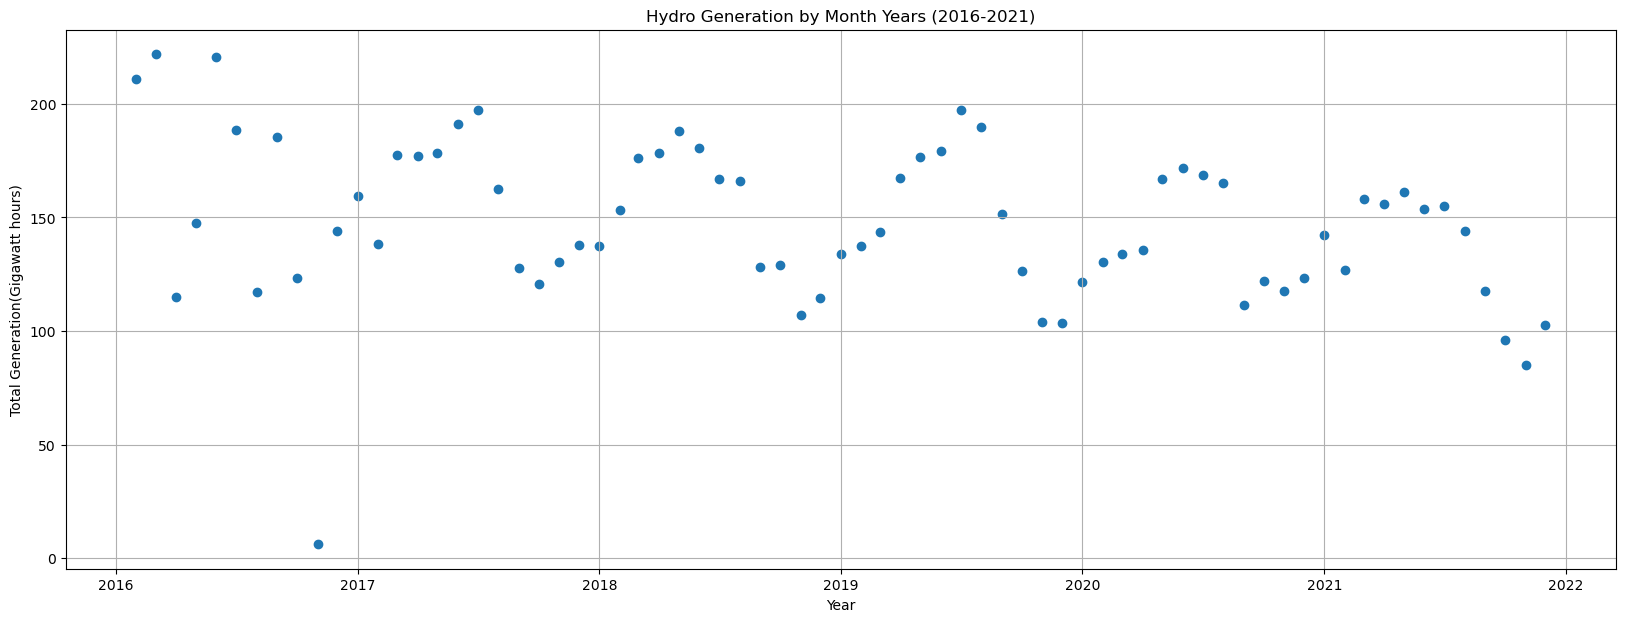

In [13]:
# Plot Hydro over the months

plt.figure(figsize=(20,7))
plt.scatter(x='Period', y='Energy Generation', data=correct_hydro_range)
plt.xlabel('Year')
plt.ylabel('Total Generation(Gigawatt hours)')
plt.title('Hydro Generation by Month Years (2016-2021)')
plt.grid()


### In a review of the hydroelectric use month over month, the usage increases through the early months of the year with a drop off generally in mid to late summer. This may be based on the seasonality of the energy source in Colorado based on climate.

In [14]:
# Import all other types of renewable energy generation, We are going to look at wind and solar
renewable_energy_df = pd.DataFrame(pd.read_csv('CSV/Renewable_energy_generation.csv'))

# Sort for the desired date range 
renewable_energy_df['Period'] = pd.to_datetime(renewable_energy_df['Period'])
renewable_energy_df.sort_values(by='Period', inplace = True)
mask = (renewable_energy_df['Period'] > '2016-01-01') & (renewable_energy_df['Period'] <= '2021-12-01')
correct_renewable_range=renewable_energy_df.loc[mask]

# Filter for wind 
monthly_fuel_type= correct_renewable_range.sort_values(by=['Fuel Type','Period'])
wind=monthly_fuel_type[monthly_fuel_type['Fuel Type']=='wind']
#wind.sort_values(by='Period', inplace =True)

# Filter for solar
monthly_fuel_type= correct_renewable_range.sort_values(by=['Fuel Type','Period'])
solar=monthly_fuel_type[monthly_fuel_type['Fuel Type']=='solar']
#solar.sort_values(by='Period',inplace =True)


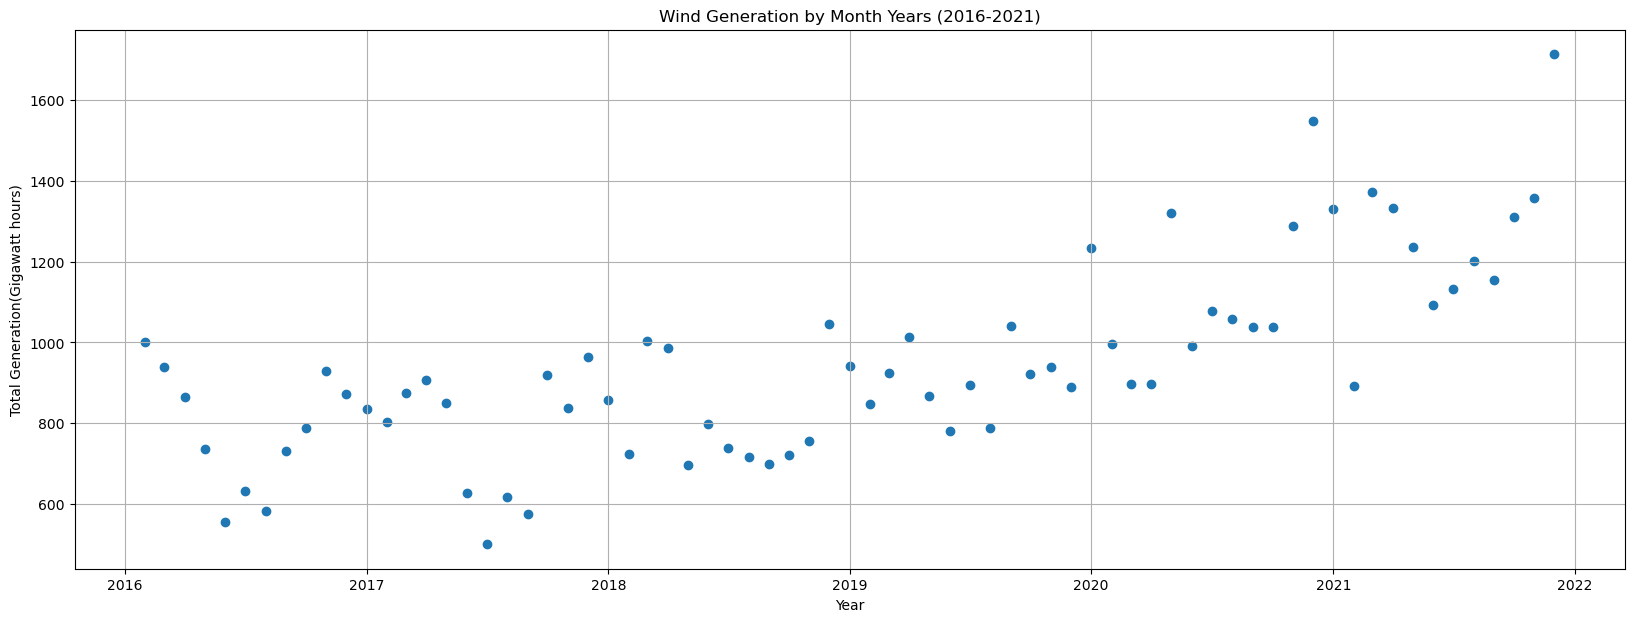

In [15]:
# Plot Wind over the months

plt.figure(figsize=(20,7))
plt.scatter(x='Period', y='Energy Generation', data=wind)
plt.xlabel('Year')
plt.ylabel('Total Generation(Gigawatt hours)')
plt.title('Wind Generation by Month Years (2016-2021)')
plt.grid()

### Wind has a usage pattern distinct from hydroelectric, as it sees a decline over the spring to summer months while usage increases in fall and winter. This may again be based on Colorado's changing seasons and weather patterns.

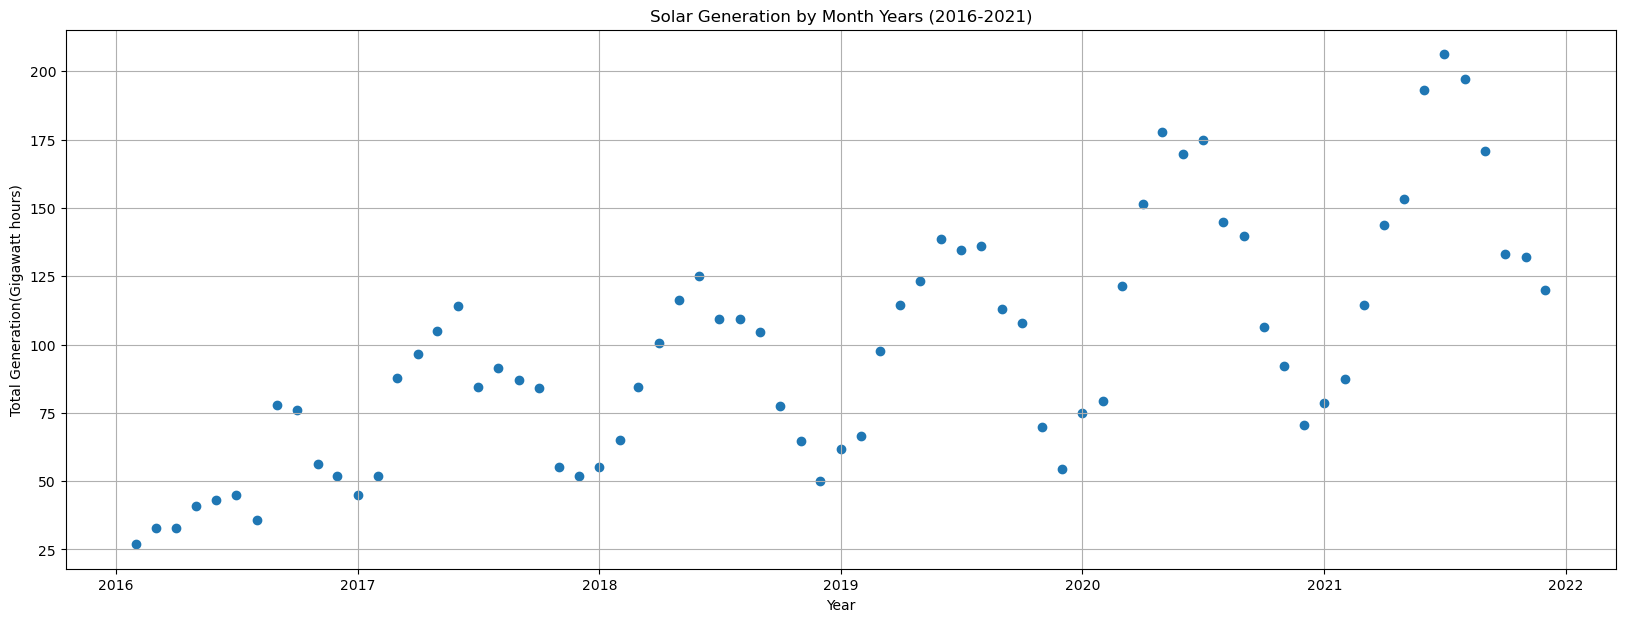

In [16]:
# Plot Solar over the months

plt.figure(figsize=(20,7))
plt.scatter(x='Period', y='Energy Generation', data=solar)
plt.xlabel('Year')
plt.ylabel('Total Generation(Gigawatt hours)')
plt.title('Solar Generation by Month Years (2016-2021)')
plt.grid()

### As with the other two reviewed renewable energy sources, solar usage is based on season trends month over month in Colorado. Solar usage increase through the spring and summer months with a sharp decline in the fall. Because solar has a smaller percentage of total renewable use, the variations month over month appear much larger than the other sources. 

In [17]:
#Coal

coal_df = pd.DataFrame(pd.read_csv('CSV/Coal_Generated.csv'))
coal_df

,Fuel Type,Amount Generated,Units Measured,Period
0,all coal products,29948.67505,thousand megawatthours,2016
1,all coal products,29242.21643,thousand megawatthours,2017
2,all coal products,26382.06016,thousand megawatthours,2018
3,all coal products,25320.50278,thousand megawatthours,2019
4,all coal products,19478.40504,thousand megawatthours,2020
5,all coal products,23602.04163,thousand megawatthours,2021
6,all coal products,21723.00385,thousand megawatthours,2022


r-value = -0.8608456964580077


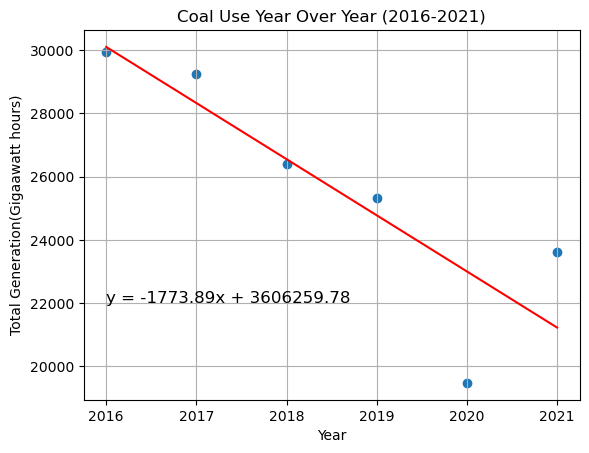

In [18]:
# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
coal_df = coal_df[(coal_df['Period'] >= 2016) & (coal_df['Period'] <= 2021)]

plt.scatter(x='Period', y='Amount Generated', data=coal_df)

plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Coal Use Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(coal_df['Period'], coal_df['Amount Generated'])
plt.plot(coal_df['Period'], m*coal_df['Period'] + b, color='red')
plt.text(2016, 22000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

### Coal use has decreased substaintially over 2016-2021. It saw a slight increase in 2021 but only after a large regression in 2020. This outlier may have been cause due to the pandemic in 2020.



In [19]:
#Natural Gas

nat_gas_df = pd.DataFrame(pd.read_csv('CSV/Nat_Gas_Generated.csv'))
nat_gas_df

,Fuel Type,Amount Generated,Units Measured,Period
0,natural gas,12679.43938,thousand megawatthours,2016
1,natural gas,12532.24249,thousand megawatthours,2017
2,natural gas,16398.43941,thousand megawatthours,2018
3,natural gas,17097.11593,thousand megawatthours,2019
4,natural gas,18171.33776,thousand megawatthours,2020
5,natural gas,14559.77311,thousand megawatthours,2021
6,natural gas,15612.43366,thousand megawatthours,2022


r-value = 0.6131775671573778


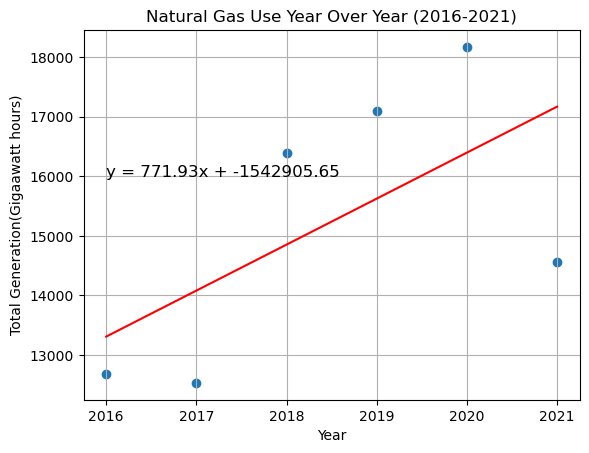

In [20]:
nat_gas_df = nat_gas_df[(nat_gas_df['Period'] >= 2016) & (nat_gas_df['Period'] <= 2021)]

plt.scatter(x='Period', y='Amount Generated', data=nat_gas_df)

plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Natural Gas Use Year Over Year (2016-2021)')

m, b, r, _, _ = linregress(nat_gas_df['Period'], nat_gas_df['Amount Generated'])
plt.plot(nat_gas_df['Period'], m*nat_gas_df['Period'] + b, color='red')
plt.text(2016, 16000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')

plt.grid()
plt.show()

### Natural Gas use is the largest source of energy in Colorado, either non-renewable or renewable. There was a sharp decline in 2021 after a period high in 2020. This may have been because of the global pandemic starting in 2020 which has an impact on multiple energy sources.



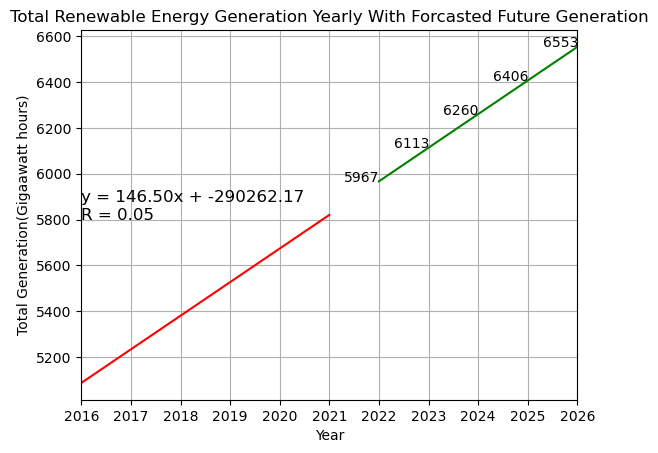

In [21]:
#prediction for total renew energy
# Filter the DataFrame to only include data between 2016 and 2021

total_energy_df = total_energy_df[(total_energy_df['Period'] >= 2016) & (total_energy_df['Period'] <= 2021)]

# Create a scatter plot with Period on the x-axis and Amount Generated on the y-axis
#plt.scatter(x='Period', y='Amount Generated', data=coal_df)

# Set the x-axis limits to only include the period between 2016-2021
plt.xlim(2016, 2026)

# Set the x-axis tick locations and labels

plt.xticks([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026])
plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Total Renewable Energy Generation Yearly With Forcasted Future Generation')


# Calculate and plot the regression line

m, b, r, _, _ = linregress(total_energy_df['Period'], total_energy_df['Value'])
plt.plot(total_energy_df['Period'], m*total_energy_df['Period'] + b, color='red')

# Display the regression equation and r-value on the plot

plt.text(2016, 5800, f'y = {m:.2f}x + {b:.2f}\nR = {r:.2f}', fontsize=12)

# Make predictions for the next 5 years (2022-2026) using the regression equation

x_pred = np.array([2022, 2023, 2024, 2025, 2026])
y_pred = m*x_pred + b
plt.plot(x_pred, y_pred, color='green')
plt.grid()

for x, y in zip(x_pred, y_pred):
    plt.text(x-.34, y-1, f'{y:.0f}', ha='center')
    
plt.show()

In [22]:
merged_df = pd.merge(coal_df, nat_gas_df, on='Period', suffixes=('_coal', '_nat_gas'))
merged_df

,Fuel Type_coal,Amount Generated_coal,Units Measured_coal,Period,Fuel Type_nat_gas,Amount Generated_nat_gas,Units Measured_nat_gas
0,all coal products,29948.67505,thousand megawatthours,2016,natural gas,12679.43938,thousand megawatthours
1,all coal products,29242.21643,thousand megawatthours,2017,natural gas,12532.24249,thousand megawatthours
2,all coal products,26382.06016,thousand megawatthours,2018,natural gas,16398.43941,thousand megawatthours
3,all coal products,25320.50278,thousand megawatthours,2019,natural gas,17097.11593,thousand megawatthours
4,all coal products,19478.40504,thousand megawatthours,2020,natural gas,18171.33776,thousand megawatthours
5,all coal products,23602.04163,thousand megawatthours,2021,natural gas,14559.77311,thousand megawatthours


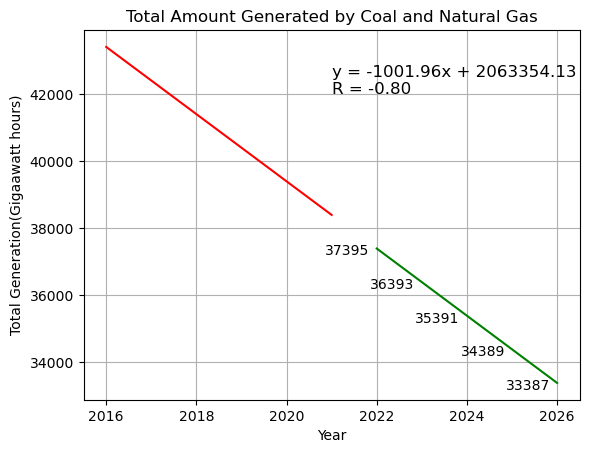

In [23]:
#plt.scatter(x=merged_df['Period'], y=merged_df['Amount Generated_coal'] + merged_df['Amount Generated_nat_gas'])
plt.xlabel('Year')
plt.ylabel('Total Generation(Gigaawatt hours)')
plt.title('Total Amount Generated by Coal and Natural Gas')
# Calculate and plot the regression line
m, b, r, _, _ = linregress(merged_df['Period'], merged_df['Amount Generated_coal'] + merged_df['Amount Generated_nat_gas'])
plt.plot(merged_df['Period'], m*merged_df['Period'] + b, color='red')
# Display the regression equation and r-value on the plot
plt.text(2021, 42000, f'y = {m:.2f}x + {b:.2f}\nR = {r:.2f}', fontsize=12)
x_pred = np.array([2022, 2023, 2024, 2025, 2026])
y_pred = m*x_pred + b
plt.plot(x_pred, y_pred, color='green')
plt.grid()
for x, y in zip(x_pred, y_pred):
    plt.text(x-.65, y-200, f'{y:.0f}', ha='center')
plt.show()